## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

python WikiExtractor.py -b 100M -o . zhwiki-20190720-pages-articles-multistream.xml.bz2 #抽取wiki数据,分割成每个大小100M的包


opencc.exe  -i ..\AA\wiki_02  -o ..\AA\zh_wiki_02 -c t2s.json #繁体转简体

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [1]:
import jieba
import multiprocessing
from pathlib import Path
from gensim.models import word2vec,Word2Vec
from gensim.test.utils import get_tmpfile
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import re

In [2]:
zh_stop_words = set()
with open(r'chinese_stopwords.txt','r',encoding='utf-8') as stop_words:
    for line in stop_words.readlines():
        stop_word = line.strip('\n')
        zh_stop_words.add(stop_word)

In [3]:
wiki = Path(r'/home/qinhao/nlp/assignments/AA')

In [4]:
wiki.parent

PosixPath('/home/qinhao/nlp/assignments')

In [31]:
def hanziconv(inputdir,outputdir):
    inputdir = Path(inputdir)
    outputdir = Path(outputdir)
    if not inputdir.exists():
        print("Input DIR is not exist!")
        exit()
    elif not outputdir.exists():
        outputdir.mkdir(parents=True, exist_ok=True)
    for wiki in tqdm(inputdir.iterdir()):
        os.system('C:\\Users\\qinha\\Documents\\nlp\\assignments\\opencc-1.0.1-win64\\opencc.exe -i {infile} -o {outfile} -c C:\\Users\\qinha\\Documents\\nlp\\assignments\\opencc-1.0.1-win64\\t2s.json'.format(
        infile=str(wiki),outfile=str(outputdir)+'\\zh'+wiki.name) )
        

In [16]:
hanziconv(r'C:\Users\qinha\Documents\nlp\assignments\AA',r'C:\Users\qinha\Documents\nlp\assignments\BB')


0it [00:00, ?it/s]
1it [00:05,  5.41s/it]
2it [00:10,  5.44s/it]
3it [00:16,  5.55s/it]
4it [00:22,  5.63s/it]
5it [00:28,  5.65s/it]
6it [00:34,  5.71s/it]
7it [00:39,  5.71s/it]
8it [00:45,  5.75s/it]
9it [00:51,  5.79s/it]
10it [00:57,  5.82s/it]
11it [01:03,  5.85s/it]
12it [01:09,  5.87s/it]
13it [01:14,  5.72s/it]

In [40]:
def data_wash(file):
    with open(file,'r',encoding='utf-8') as f:
        i = 0
        text = []
        for line in f.readlines():
            line = line.strip()
            if line =='' or line.startswith('<doc') or line.startswith('</doc'):#删除空行和html标签行
                i += 1
                continue
            words = []
            for word in jieba.cut(line):
                if word in zh_stop_words or not re.search('\w',word):continue
                words.append(word)
            i += 1
            if len(words) > 0:
                sentence = ' '.join(words) + '\n'
                text.append(sentence)
                words = []
            if i % 50000 == 0:
                print("line number:",i)
        return text

In [41]:
import os
def convert(inputdir,outputdir,func):
    inputdir = Path(inputdir)
    outputdir = Path(outputdir)
    if not inputdir.exists():
        print("Input DIR is not exist!")
        exit()
    elif not outputdir.exists():
        outputdir.mkdir(parents=True, exist_ok=True)
    for wiki in tqdm(inputdir.iterdir()):
        output_file = str(outputdir)+os.sep+func.__name__+wiki.name
        wiki_out = func(wiki)
        with open(output_file,'w',encoding='utf-8') as outf:
            outf.writelines(wiki_out)

In [42]:
convert(r'C:\Users\qinha\Documents\nlp\assignments\BB',r'C:\Users\qinha\Documents\nlp\assignments\CC',data_wash)







0it [00:00, ?it/s]

line number: 100000
line number: 350000
line number: 400000
line number: 450000
line number: 500000
line number: 600000








1it [02:45, 165.71s/it]

line number: 50000
line number: 200000
line number: 350000
line number: 400000
line number: 550000
line number: 600000
line number: 650000
line number: 700000
line number: 800000








2it [05:36, 167.20s/it]

line number: 250000
line number: 350000
line number: 400000
line number: 450000
line number: 600000
line number: 700000
line number: 800000
line number: 850000








3it [08:28, 168.81s/it]

line number: 50000
line number: 100000
line number: 200000
line number: 400000
line number: 600000
line number: 650000








4it [11:21, 169.90s/it]

line number: 300000
line number: 500000
line number: 600000
line number: 700000
line number: 850000








5it [14:15, 171.20s/it]

line number: 100000
line number: 550000
line number: 750000
line number: 1000000
line number: 1050000








6it [17:00, 169.29s/it]

line number: 50000
line number: 300000
line number: 400000
line number: 500000
line number: 650000
line number: 800000
line number: 850000
line number: 950000
line number: 1050000
line number: 1150000








7it [19:59, 172.25s/it]

line number: 150000
line number: 200000
line number: 350000
line number: 450000
line number: 500000
line number: 600000
line number: 850000
line number: 900000
line number: 950000
line number: 1000000
line number: 1250000
line number: 1550000
line number: 1600000
line number: 1750000








8it [22:53, 172.68s/it]

line number: 100000
line number: 200000
line number: 250000
line number: 600000
line number: 900000
line number: 1050000
line number: 1150000
line number: 1500000








9it [25:46, 172.82s/it]

line number: 50000
line number: 150000
line number: 200000
line number: 400000
line number: 550000
line number: 800000
line number: 850000
line number: 900000
line number: 1000000








10it [28:34, 171.51s/it]

line number: 50000
line number: 100000
line number: 150000
line number: 400000
line number: 700000
line number: 850000
line number: 1000000
line number: 1100000








11it [31:22, 170.34s/it]

line number: 50000
line number: 350000
line number: 450000
line number: 500000
line number: 550000
line number: 600000
line number: 800000
line number: 850000
line number: 900000
line number: 1000000
line number: 1050000
line number: 1150000








12it [34:12, 170.20s/it]

line number: 50000
line number: 150000
line number: 300000
line number: 700000
line number: 1100000








13it [36:48, 165.90s/it]

In [10]:
path = get_tmpfile('word2vec.model')
sentences = word2vec.LineSentence(r'/home/qinhao/nlp/assignments/CC/data_washzhwiki_00')
model = Word2Vec(size=200,window=5,min_count=1,workers=multiprocessing.cpu_count()-1)
model.build_vocab(sentences)

In [11]:
%timeit
data_path = Path(r'/home/qinhao/nlp/assignments/CC')
for data_file in tqdm(data_path.iterdir()):
    moresentences = word2vec.LineSentence(str(data_file))
    model.train(moresentences,total_examples=model.corpus_count,epochs=5)
model.save(path)


14it [19:01, 69.68s/it]


## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [12]:
model = Word2Vec.load(r'/home/qinhao/nlp/assignments/all.model')

In [13]:
for key in model.similar_by_word('学生',topn=10):
    print(key)

/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


('高中学生', 0.7110780477523804)
('小学生', 0.6659013628959656)
('同学', 0.6609445810317993)
('中学生', 0.6497840881347656)
('女生', 0.6447247266769409)
('学童', 0.6314136385917664)
('师生', 0.6246892213821411)
('低年级', 0.6191005110740662)
('教师', 0.6158695220947266)
('学生家长', 0.6139034628868103)


In [35]:
a=model.wv.vocab
print(type(a))
i = 0 
for k,v in a.items():
    if i< 50:
        print(k,v)
        i += 1


<class 'dict'>
数学 Vocab(count:3345, index:391, sample_int:4294967296)
利用 Vocab(count:4470, index:253, sample_int:4294967296)
符号语言 Vocab(count:5, index:119909, sample_int:4294967296)
研究 Vocab(count:15187, index:18, sample_int:4294967296)
数量 Vocab(count:3146, index:428, sample_int:4294967296)
结构 Vocab(count:4872, index:215, sample_int:4294967296)
变化 Vocab(count:3571, index:355, sample_int:4294967296)
空间 Vocab(count:3208, index:416, sample_int:4294967296)
概念 Vocab(count:3605, index:349, sample_int:4294967296)
一门 Vocab(count:567, index:3379, sample_int:4294967296)
学科 Vocab(count:2028, index:815, sample_int:4294967296)
某种 Vocab(count:616, index:3113, sample_int:4294967296)
角度看 Vocab(count:57, index:24515, sample_int:4294967296)
属于 Vocab(count:5708, index:155, sample_int:4294967296)
形式 Vocab(count:5187, index:185, sample_int:4294967296)
科学 Vocab(count:4566, index:240, sample_int:4294967296)
一种 Vocab(count:12343, index:28, sample_int:4294967296)
透过 Vocab(count:2806, index:501, sample_int:4294

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [32]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    i = 0
    for i,word in enumerate(model.wv.vocab):
        if i < 100:
            tokens.append(model[word])
            labels.append(word)
            i += 1
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [33]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['font.family']=['sans-serif']

/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/qinhao/anaconda3/en

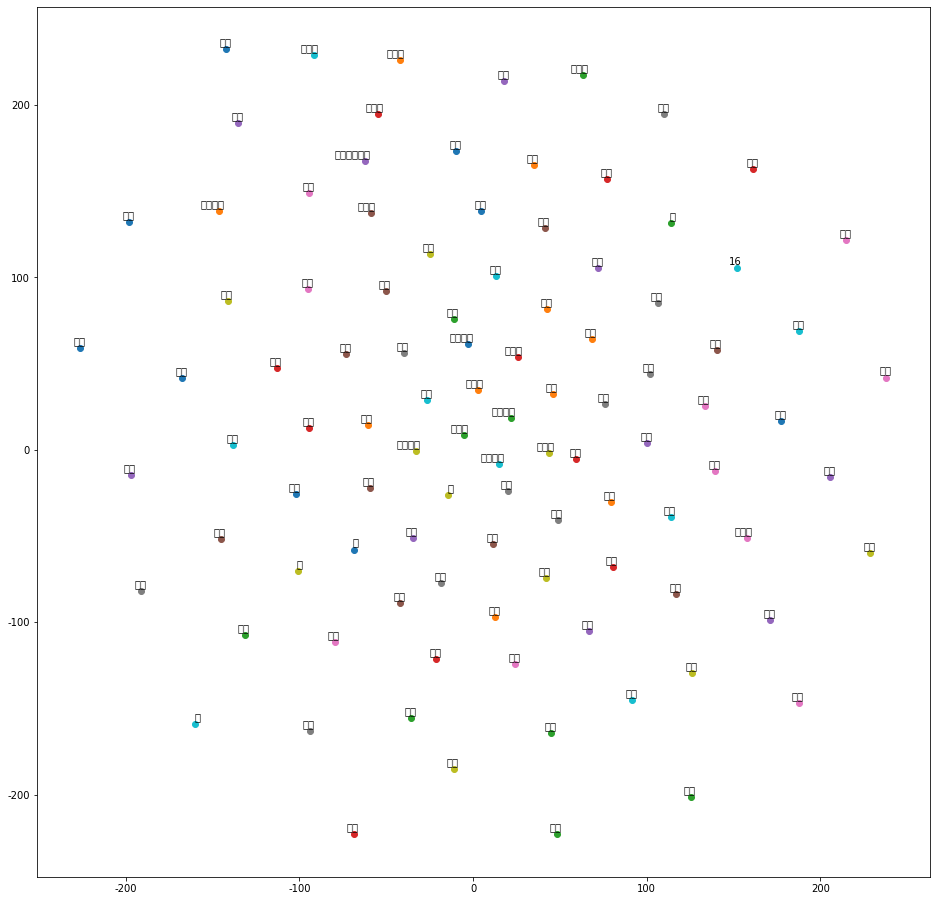

In [34]:
tsne_plot(model)